# MLE for Poisson Distribution

**Poisson Example:** In a study, researchers are interested in anayzing co-speech gestures (arm and hand movements accompanying the speech) by Katalan and Korean speakers. The data below comes from study in which participants watched a cartoon and then told a partner (a friend or a professor) about what they had seen. The data is available as a `.csv` file in the following [Github repository](https://github.com/bodowinter/poisson_tutorial/blob/main/dyads.csv). 

If you place the word `flat` at the beginning of data url you can quickly view data as a [Flat Data](https://next.github.com/projects/flat-data/) as given [here](https://flatgithub.com/bodowinter/poisson_tutorial/blob/main/dyads.csv?filename=dyads.csv&sha=8ec33096abe1ee1ec389b05b3b4490e3dac37304).

**Question:** Assuming that the number of gestures follows a Poisson distribution with a mean parameter $\lambda$. Find the maximum likelihood estimate of $\lambda$ based on this sample.

In [18]:
#turn off warnings
import warnings
warnings.filterwarnings("ignore")

In [19]:
#import required libraries
import pandas as pd
import numpy as np
from scipy.special import factorial
import matplotlib.pyplot as plt

First import the data, check its shape (size), and hava a look at a few first lines. Please note that to read a `.csv` file from a `GitHub` repository, first go to the url where the data is available, click on the data set, then a preview window will open, and click on the `Raw data` button, copy thins url and paste it into `pd.read_csv`.

In [23]:
gesture_data = pd.read_csv("https://raw.githubusercontent.com/bodowinter/poisson_tutorial/main/dyads.csv")

In [24]:
#size of the data frame
gesture_data.shape

(54, 6)

In [156]:
#let's see the first 10 rows
gesture_data.head(n = 10) 

,ID,context,dur,language,gender,gestures
0,Catalan_1,friend,137,Catalan,M,61
1,Catalan_1,prof,136,Catalan,M,78
2,Catalan_11,friend,117,Catalan,F,61
3,Catalan_11,prof,165,Catalan,F,73
4,Catalan_12,friend,134,Catalan,M,58
5,Catalan_12,prof,132,Catalan,M,51
6,Catalan_13,friend,180,Catalan,M,101
7,Catalan_13,prof,173,Catalan,M,82
8,Catalan_14,friend,160,Catalan,M,56
9,Catalan_14,prof,172,Catalan,M,74


Get the gestures column only and change its name.

In [8]:
#get only the gestures column
data = gesture_data.gestures

Check the mean.

In [124]:
np.mean(data)

49.44444444444444

In [9]:
#creater a grid vector for lambda
lambd = np.arange(1, 1000, 1)
#print(lambd)

Define a function which calculates the MLE of the data under a Poisson distribution. This function requires two parameters: data and a vector of possible values for $\lambda$ parameter. Then, the function calculates the log-likelihood of the data for each $\lambda$ value, and plot log-likelihood values versus $\lambda$ values. The $\hat \lambda$ where the curve the attains a maximum can considered as the maximum likelihood estimate for $\lambda$.

In [12]:
def poisson_loglik(data, lambd):
    
    #fixed values
    n = np.size(data)
    sum_x = np.sum(data)
    sum_in_x_factorial = np.sum(np.log(factorial(data)))
    
    #define log_likelihood
    log_lik = -lambd*n + sum_x * np.log(lambd)-sum_in_x_factorial
    
    # plot log-lik versus lambda values
    fig, ax = plt.subplots(figsize = (6, 6))

    plt.plot(lambd, log_lik)  
    plt.axvline(x=lambd[np.argmax(log_lik)], color='r') #find the lambda where log-lik is a maximum.
    ax.text(49, -48000, '49', color='red', ha='center', va='top') #not a smart way         
    plt.xlabel(r'$\lambda$')
    plt.ylabel('Log-likelihood value')
    plt.title('Log-likelihood of gestures data under Poisson Distribution')
    plt.legend(loc='upper right')
    plt.show()

No handles with labels found to put in legend.


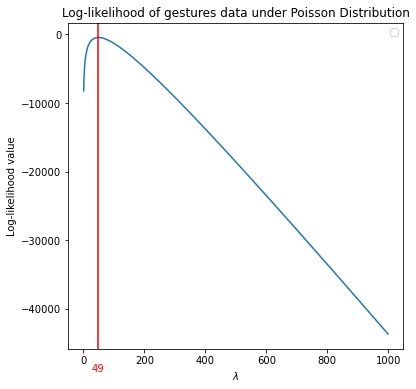

In [11]:
poisson_loglik(data = gesture_data.gestures, lambd = lambd)

The $\hat \lambda$ = 49 is the MLE for $\lambda$.

Some optimzation routines in Python may prefer minimizing an objective function. In that case, we need to define negative log-likelihood. In such a case, the $\hat \lambda$ where the curve the attains a minimum can considered as the maximum likelihood estimate for $\lambda$.

In [15]:
def poisson_negloglik(data, lambd):
    
    #fixed values
    n = np.size(data)
    sum_x = np.sum(data)
    sum_in_x_factorial = np.sum(np.log(factorial(data)))
    
    #define log_likelihood
    log_lik = -lambd*n + sum_x * np.log(lambd)-sum_in_x_factorial
    
    neg_log_lik = -log_lik
    
    # plot neg-log-lik versus lambda values
    fig, ax = plt.subplots(figsize = (6, 6))

    plt.plot(lambd, neg_log_lik)  
    plt.axvline(x=lambd[np.argmin(neg_log_lik)], color='r') #find the lambda where neg_log-lik is a minimum.
    ax.text(49, -3000, '49', color='red', ha='center', va='top') #not a smart way         
    plt.xlabel(r'$\lambda$')
    plt.ylabel('Negative log-likelihood value')
    plt.title('Log-likelihood of gestures data under Poisson Distribution')
    plt.legend(loc='upper right')
    plt.show()

No handles with labels found to put in legend.


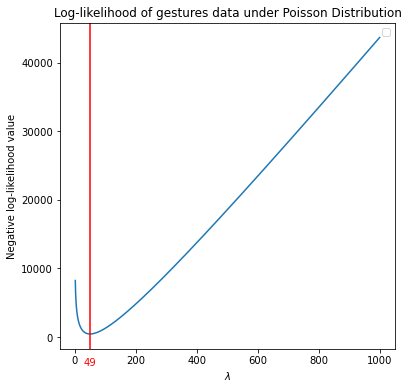

In [16]:
poisson_negloglik(data = gesture_data.gestures, lambd = lambd)